In [1]:
from google.colab import files
uploaded = files.upload()


Saving Advertising_Data.csv to Advertising_Data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [5]:

df = pd.read_csv('Advertising_Data.csv')


df.head()


,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [6]:

print("Missing Values:\n", df.isnull().sum())


df.info()


df.describe()


Missing Values:
 TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


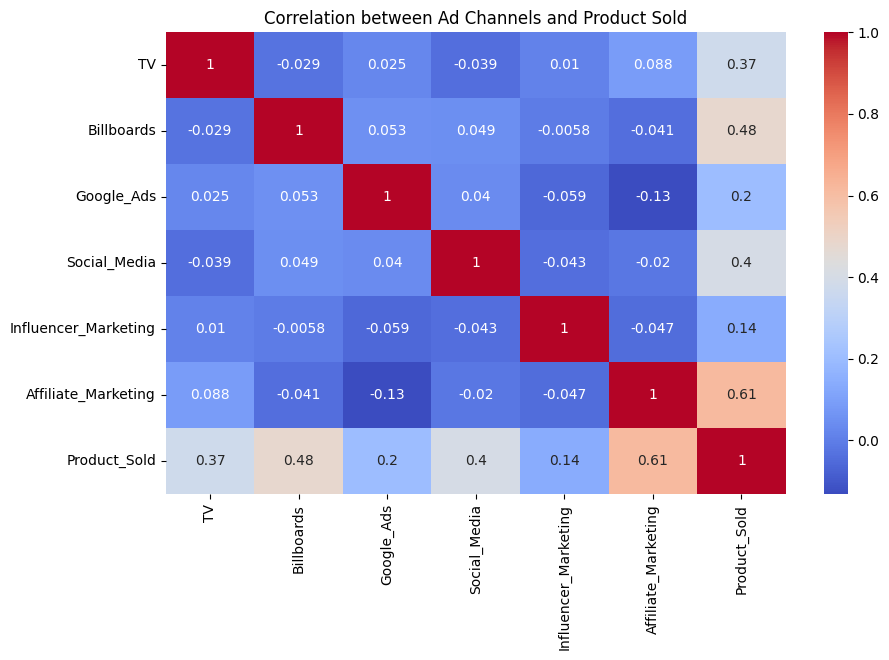

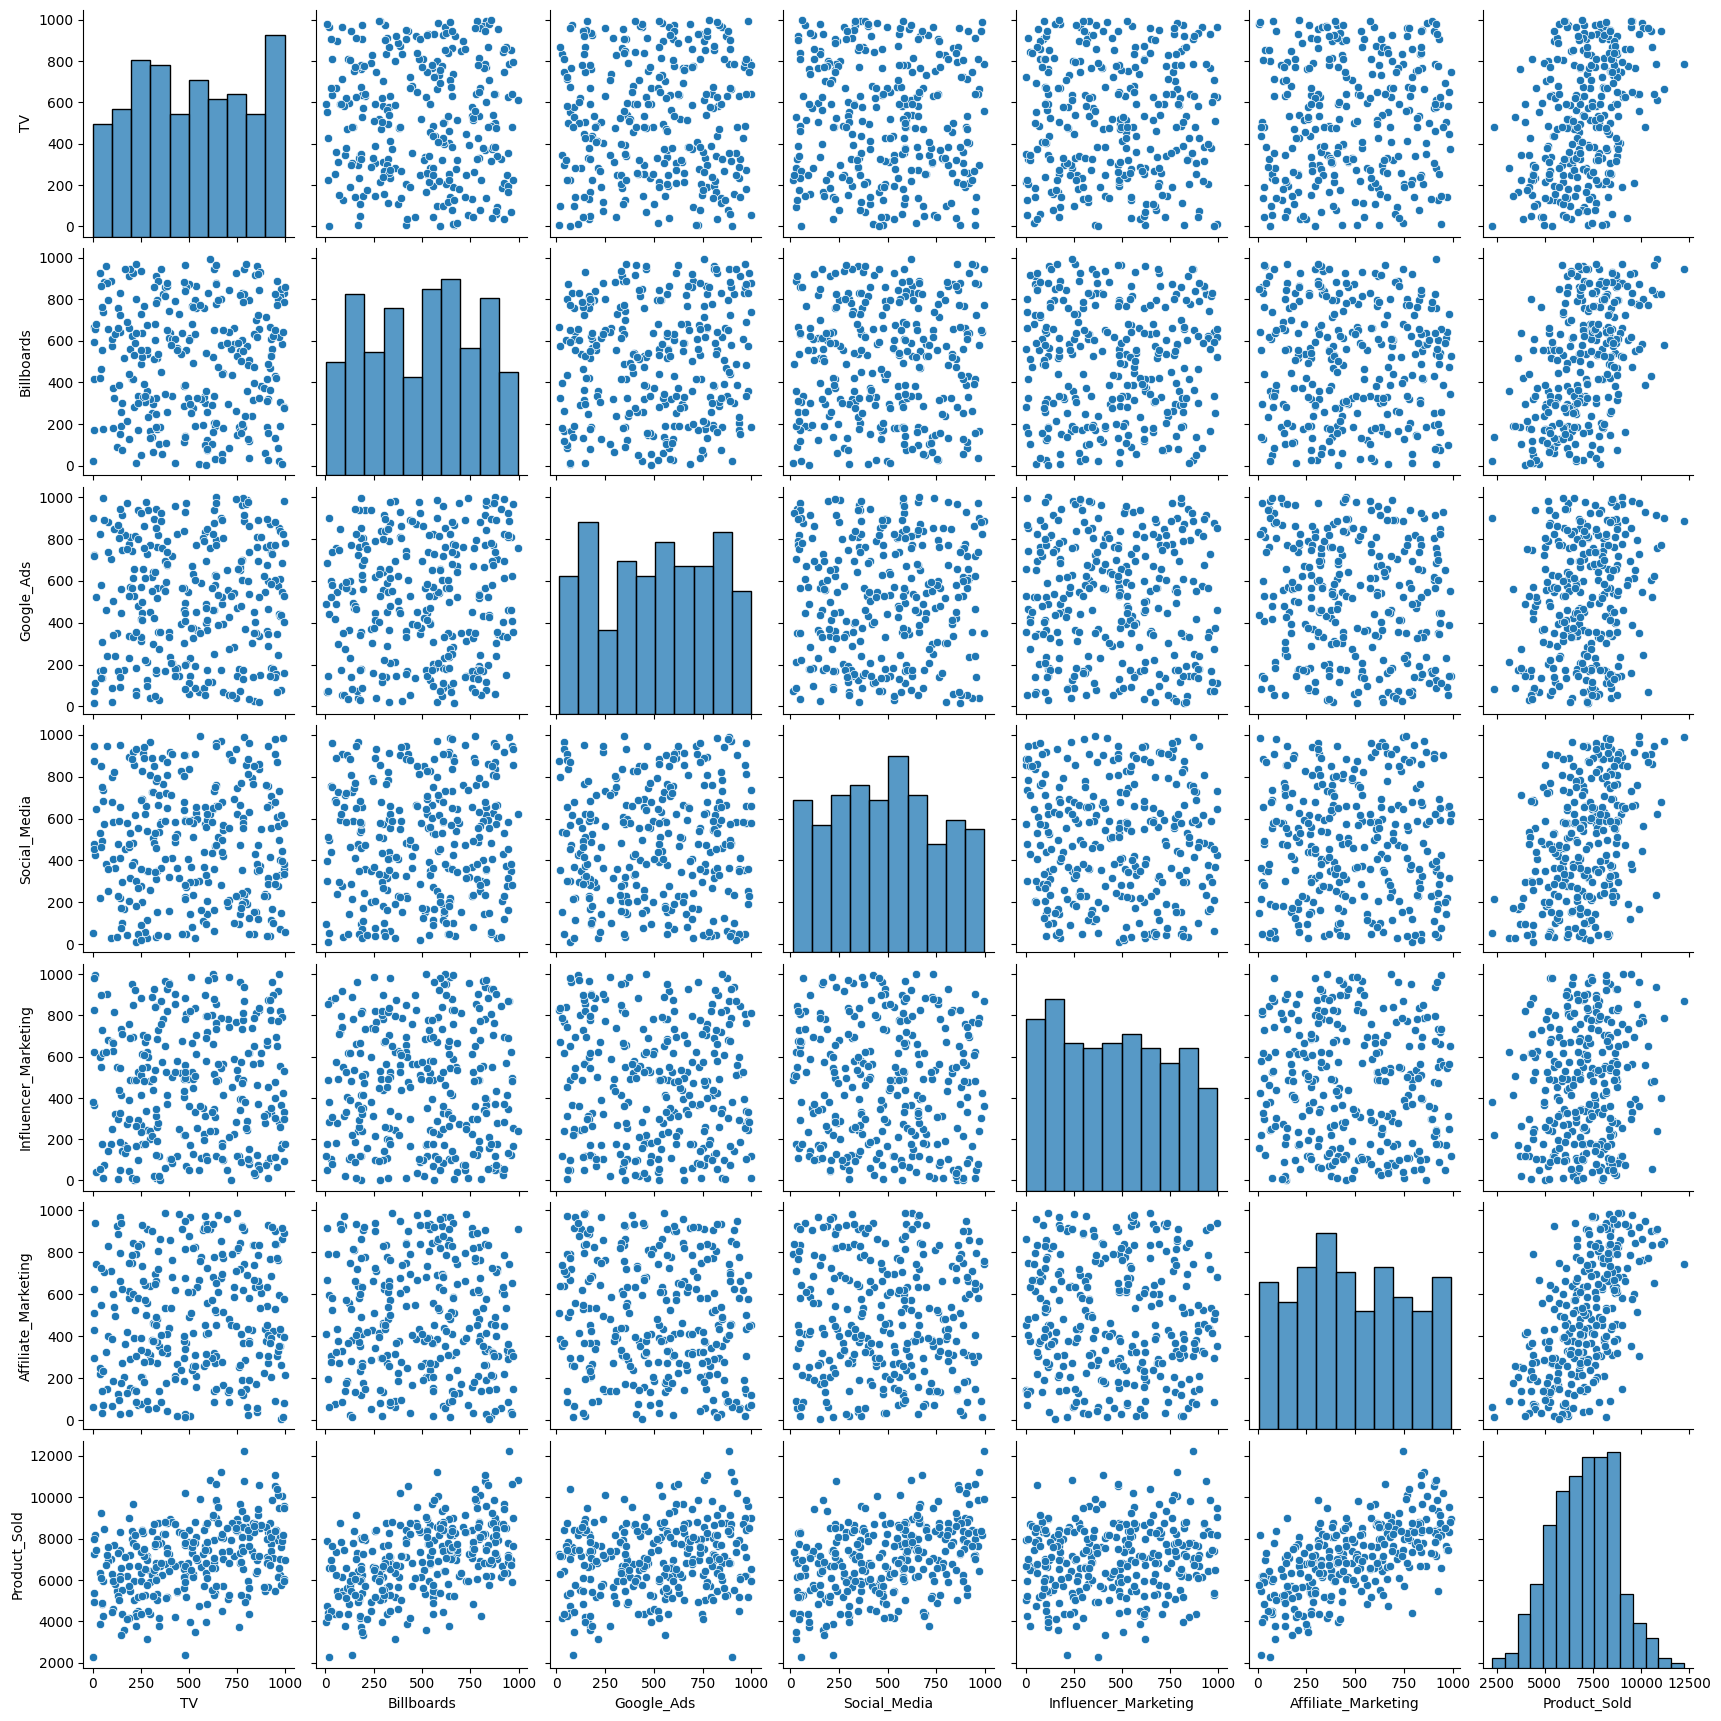

In [7]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Ad Channels and Product Sold")
plt.show()


sns.pairplot(df)
plt.show()


In [10]:

X = df.drop(columns=['Product_Sold'])
y = df['Product_Sold']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [13]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


print("\nIntercept:", model.intercept_)
print("Coefficients:")
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coeff_df)


Mean Squared Error (MSE): 75.36591771292059
R² Score: 0.9999736866138691

Intercept: 1.3474765058381308
Coefficients:
                Feature  Coefficient
0                    TV     2.001823
1            Billboards     2.998532
2            Google_Ads     1.498071
3          Social_Media     2.499797
4  Influencer_Marketing     1.199659
5   Affiliate_Marketing     3.996625


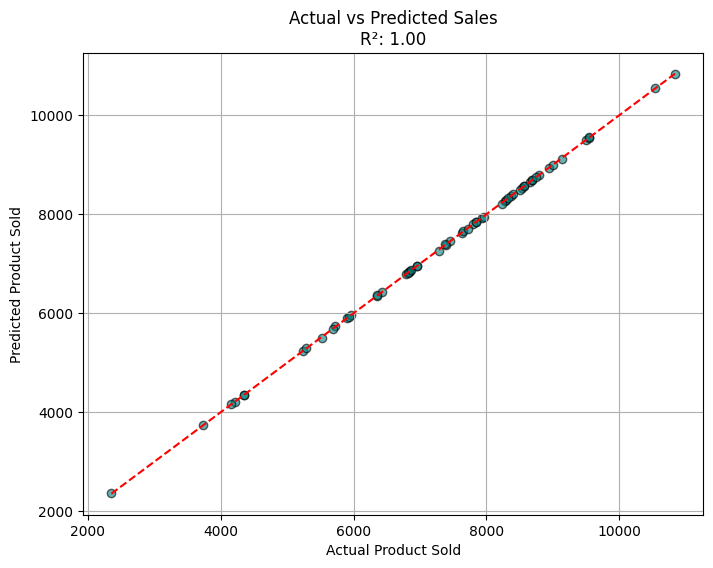

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Product Sold")
plt.ylabel("Predicted Product Sold")
plt.title(f"Actual vs Predicted Sales\nR²: {r2:.2f}")
plt.grid(True)
plt.show()
